![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

In [0]:
from keras.layers import Embedding
# embedding층은 최소 2개의 매개 변수를 받음
# 마찬가지로 여기에서도 index 0은 사용하지 않음
embedding_layer = Embedding(1000, 64) # samples, sequence length

In [21]:
# imdb 준비해서 리뷰 빈도 1만 개까지 가져오고 리뷰에서 20개 이후 단어는 버림.
# 1만 개의 단어에 대해 8차원의 임베딩을 학습하여 정수(2d int)를 임베딩 시퀀스(3d float)로 바꿈
# 다음 이 텐서를 2d로 바꾸고 펼치고 분류를 위한 denses층을 훈련함

from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어 수
max_features = 10000

# 사용할 텍스트 길이
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [22]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [0]:
# 리스트를 (sample, maxlen) 크기의 2d 정수 텐서로 변환.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

In [24]:
x_train.shape, x_train[0][:10]

((25000, 20),
 array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16],
       dtype=int32))

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()

# 나중에 임베딩된 입력을 Flatten할 거라 임베딩층에 imput_length를 지정
model.add(Embedding(10000, 8, input_length = maxlen))
# 출력은 (samples, maxlen, 8)이 나옴

In [26]:
model.output

<tf.Tensor 'embedding_5/embedding_lookup/Identity:0' shape=(?, 20, 8) dtype=float32>

In [27]:
model.add(Flatten())
model.output

<tf.Tensor 'flatten_2/Reshape:0' shape=(?, ?) dtype=float32>

In [28]:
model.add(Dense(1, activation = 'sigmoid'))
model.output

<tf.Tensor 'dense_2/Sigmoid:0' shape=(?, 1) dtype=float32>

In [29]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 179us/step - loss: 0.6741 - acc: 0.6105 - val_loss: 0.6356 - val_acc: 0.6906
Epoch 2/10
20000/20000 [==============================] - 3s 162us/step - loss: 0.5629 - acc: 0.7448 - val_loss: 0.5436 - val_acc: 0.7258
Epoch 3/10
20000/20000 [==============================] - 3s 146us/step - loss: 0.4744 - acc: 0.7826 - val_loss: 0.5083 - val_acc: 0.7432
Epoch 4/10
20000/20000 [==============================] - 3s 160us/step - loss: 0.4264 - acc: 0.8102 - val_loss: 0.4991 - val_acc: 0.7522
Epoch 5/10
20000/20000 [==============================] - 3s 156us/step - loss: 0.3935 - acc: 0.8259 - val_loss: 0.4991 - val_acc: 0.7546
Epoch 6/10
20000/20000 [==============================] - 3s 144us/step - loss: 0.3664 - acc: 0.8420 - val_loss: 0.5027 - val_acc: 0.7520
Epoch 7/10
20000/20000 [==============================] - 3s 140us/step - loss: 0.3425 - acc: 0.8555 - val_loss: 0.5103 - v

## 사전 훈련된 단어 임베딩 사용하기

In [0]:
# 사전 훈련된 conv net 사용하는 것과 같음
# 충분한 데이터가 없어서 학습시킬 여건이 되지 않지만 일반적인 특성이 필요할 때
# 리뷰 하나를 문자열로 만들어보자

In [3]:
import zipfile
 
try:
    with zipfile.ZipFile('/content/drive/My Drive/dataset/aclImdb.zip') as zf:
        zf.extractall('/content/dataset/')
        print("uncompress success")
 
except:
    print("uncompress fail")



uncompress success


In [4]:
import os
imdb_dir = '/content/dataset/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  print(dir_name)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt': # txt 파일이라면
      f = open(os.path.join(dir_name, fname), encoding = 'utf8')
      texts.append(f.read()) # 열어서 텍스트만 저장
      f.close()

      # 부정이면 0, 긍정이면 1 label에 저장
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

/content/dataset/aclImdb/train/neg
/content/dataset/aclImdb/train/pos


In [5]:
a = '232231231.txt'
a[-4:]

'.txt'

In [6]:
len(labels), len(texts)

(25000, 25000)

In [7]:
# data tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 이후 단어는 버림
training_samples = 200 # 샘플은 200개
validation_samples = 10000 # 검증 샘플 10000개
max_words = 1000 # 데이터셋에서 가장 빈도가 높은 10000개의 단어만 사용함

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts); sequences

Using TensorFlow backend.


[[11,
  6,
  28,
  4,
  1,
  246,
  99,
  204,
  123,
  107,
  10,
  216,
  9,
  30,
  1,
  30,
  2,
  13,
  573,
  682,
  1,
  164,
  693,
  114,
  41,
  304,
  2,
  57,
  298,
  14,
  73,
  30,
  1,
  11,
  6,
  3,
  450,
  18,
  81,
  68,
  466,
  30,
  86,
  951,
  1,
  19,
  13,
  195,
  112,
  3,
  49,
  1,
  61,
  68,
  2,
  14,
  33,
  68,
  160,
  134,
  1,
  357,
  4,
  1,
  17,
  559,
  407,
  96,
  612,
  1,
  951,
  4,
  13,
  40,
  1,
  812,
  13,
  318,
  187,
  2,
  13,
  239,
  1,
  115,
  170,
  4,
  1,
  17,
  891,
  332,
  28,
  4,
  145,
  929,
  448,
  89,
  16,
  11,
  28],
 [11,
  194,
  193,
  413,
  506,
  515,
  263,
  20,
  1,
  35,
  10,
  69,
  3,
  70,
  4,
  261,
  1,
  113,
  6,
  391,
  2,
  1,
  62,
  344,
  6,
  18,
  9,
  124,
  25,
  24,
  385,
  10,
  101,
  81,
  34,
  11,
  28,
  79,
  691,
  1,
  4,
  9,
  9,
  13,
  90,
  31,
  3,
  434,
  15,
  32,
  361,
  349,
  18,
  15,
  69,
  26,
  158,
  1,
  275,
  20,
  18,
  20,
  1,
  94,
  53,
  1

In [8]:
word_index = tokenizer.word_index; word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [9]:
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))
data = pad_sequences(sequences, maxlen = maxlen)
data

88582개의 고유한 토큰을 찾았습니다.


array([[  0,  11,   6, ...,  16,  11,  28],
       [117, 713,   8, ..., 224,   9,  22],
       [492,   4,  12, ..., 155,  36,  69],
       ...,
       [ 24, 105, 398, ...,   4,   5, 513],
       [ 23, 197, 275, ..., 137,  64,   9],
       [758,   1,  34, ...,  67,  25, 138]], dtype=int32)

In [10]:
labels = np.asarray(labels)
print('data tensor size: ', data.shape)
print('label tensor size: ', labels.shape)

data tensor size:  (25000, 100)
label tensor size:  (25000,)


In [0]:
# 데이터를 훈련 세트와 검증 세트로 분할
# 샘플이 순서대로 있어서 섞어줘야 함(부정 후 긍정이 나옴)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [12]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((200, 100), (200,), (10000, 100), (10000,))

# Glove 내려받기
# http://bit.ly/2NJwdb

In [13]:
import zipfile
 
try:
    with zipfile.ZipFile('/content/drive/My Drive/dataset/glove-6b.zip') as zf:
        zf.extractall('/content/dataset/')
        print("uncompress success")
 
except:
    print("uncompress fail")

uncompress success


In [24]:
# '''test one line
# enter and two line''' 의 내용을 가진 메모장으로 실험해보겠다.
embeddings_index = {}
f = open(os.path.join('memo test.txt'), encoding = 'utf8')
for line in f:
  values = line.split() # \n 기준으로 나눠준다.
  word = values[0] # 해당 value의 첫 인덱스만 가져온다.
  #coefs = np.asarray(values[1:], dtype = 't32') # 첫 째줄 다음 다 가져와서 소수 타입으로 반환
  embeddings_index[word] = values[1:] # dict type으로 넣어주나 보다.
  print(values, word)
  print(embeddings_index)
f.close()

['test', 'one', 'line'] test
{'test': ['one', 'line']}
['enter', 'and', 'two', 'line'] enter
{'test': ['one', 'line'], 'enter': ['and', 'two', 'line']}


In [30]:
# 위의 것을 보고 다 이해를 했다면 이걸 보자.
# 압축해제한  파일을 파싱해서 단어와 이에 상응하는 벡터 표현을 매핑하는 인덱스를 만듦
glove_dir = '/content/dataset/'
embeddings_index = {}
# 100d는 100dimension을 말하는 것 같다
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf8')
for line in f:
  values = line.split() # \n 기준으로 나눠준다.
  word = values[0] # 해당 value의 첫 인덱스만 가져온다.
  coefs = np.asarray(values[1:], dtype = 'float32') # 첫 째줄 다음 다 가져와서 소수 타입으로 반환
  embeddings_index[word] = coefs # dict type으로 넣어주나 보다.
  break
f.close()
print(values, word)
print(coefs)
print(embeddings_index)

['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [0]:
# 압축해제한  파일을 파싱해서 단어와 이에 상응하는 벡터 표현을 매핑하는 인덱스를 만듦
glove_dir = '/content/dataset/'

embeddings_index = {}
# 100d는 100dimension을 말하는 것 같다
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf8')
for line in f:
  values = line.split() # \n 기준으로 나눠준다.
  word = values[0] # 해당 value의 첫 인덱스만 가져온다.
  coefs = np.asarray(values[1:], dtype = 'float32') # 첫 째줄 다음 다 가져와서 소수 타입으로 반환
  embeddings_index[word] = coefs # dict type으로 넣어주나 보다.
f.close()

In [33]:
print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [35]:
max_words

1000

In [40]:
# embedding에 주입할 수 있도록 임베딩 행렬을 만든다.
#(max_words, embedding_dim) 꼴이여야 함.
# 이 maxrix의 i번째 원소는 단어 인덱스의 i번째 단어에 상응하는 embedding 차원 벡터임
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items(): # 아까 위에서 실행시킨 거임
  # 우리가 벡터화 시켜놓은 위의 것들을 가져온 임베딩에서 찾자
  embedding_vector = embeddings_index.get(word) 
  if i < max_words: # 1천 개를 초과하지 않는 선에서
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector  
embedding_matrix.shape

(1000, 100)

In [42]:
# model define
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 420,065
Trainable params: 420,065
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 모델에 glove 임베딩
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
# embedding 동결함
# embedding은 사전 훈련되고 다른 부분은 랜덤초기화로 들어가게 됨
# 동결하지 않으면 사전에 했던 게 다 날아감

In [45]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.0329 - acc: 0.5800 - val_loss: 0.8422 - val_acc: 0.4981
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6984 - acc: 0.6050 - val_loss: 0.9213 - val_acc: 0.4979
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5356 - acc: 0.7350 - val_loss: 0.7675 - val_acc: 0.5135
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4013 - acc: 0.8100 - val_loss: 0.8193 - val_acc: 0.5042
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3694 - acc: 0.8550 - val_loss: 0.7288 - val_acc: 0.5299
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2929 - acc: 0.8900 - val_loss: 0.9366 - val_acc: 0.5006
Epoch 7/10
200/200 [==============================] - 1s 3ms/s

In [0]:
import matplotlib.pyplot as plt

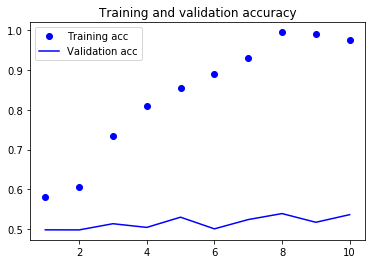

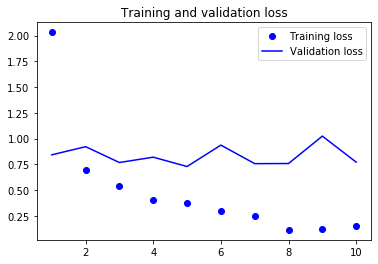

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
# 사전 훈련된 embedding을 사용하지 않고 해보기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 420,065
Trainable params: 420,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6953 - acc: 0.4400 - val_loss: 0.6925 - val_acc: 0.5119
Epoch 2/10
200/200 [==============================] - 1s 3ms/step 

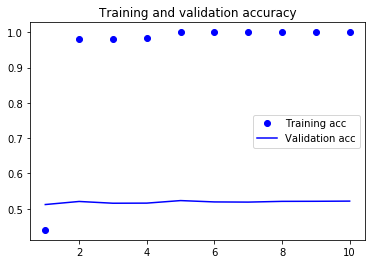

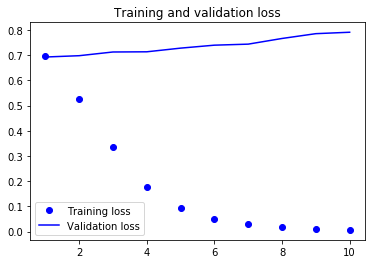

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
# 별로인듯 원래 하던 방법에 샘플 수만 늘려보자
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model2000.h5')

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 476us/step - loss: 1.0117e-07 - acc: 1.0000 - val_loss: 1.6378e-07 - val_acc: 1.0000
Epoch 2/10
2000/2000 [==============================] - 1s 513us/step - loss: 1.0085e-07 - acc: 1.0000 - val_loss: 1.5376e-07 - val_acc: 1.0000
Epoch 3/10
2000/2000 [==============================] - 1s 537us/step - loss: 1.0064e-07 - acc: 1.0000 - val_loss: 1.4656e-07 - val_acc: 1.0000
Epoch 4/10
2000/2000 [==============================] - 1s 483us/step - loss: 1.0053e-07 - acc: 1.0000 - val_loss: 1.4096e-07 - val_acc: 1.0000
Epoch 5/10
2000/2000 [==============================] - 1s 477us/step - loss: 1.0041e-07 - acc: 1.0000 - val_loss: 1.3653e-07 - val_acc: 1.0000
Epoch 6/10
2000/2000 [==============================] - 1s 493us/step - loss: 1.0037e-07 - acc: 1.0000 - val_loss: 1.3273e-07 - val_acc: 1.0000
Epoch 7/10
2000/2000 [==============================] - 1s 463us/step - loss: 1.0029e-0

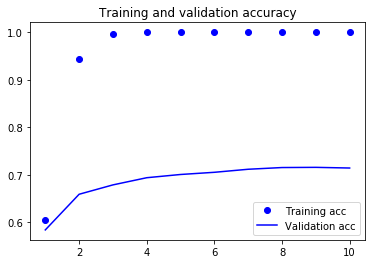

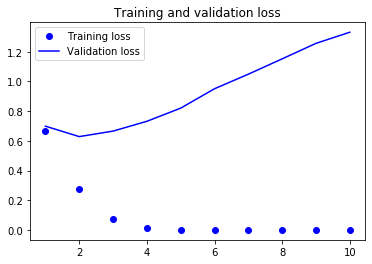

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# 마지막 테스트 데이터로 ㄱ
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding = 'utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

In [57]:
model.load_weights('pre_trained_glove_model.h5') # 200개로 했을 때
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 59us/step


[0.7723544948959351, 0.5412]

In [62]:
model.load_weights('pre_trained_glove_model2000.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 61us/step


[8.055938846597945, 0.5]

In [66]:
1+1

2